In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#4/1AX4XfWhymqHUvNO9yJYCQu-W0kdABMzc3VpRHKpD8IcBQq5BRQCO4dzJgzE
#jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --no-browser

Mounted at /content/gdrive


In [ ]:
!unzip  -P OuluCasIA gdrive/My\ Drive/B_OriginalImg.zip


Streaming output truncated to the last 5000 lines.
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Anger/025.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Anger/026.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Anger/027.jpeg  
   creating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/000.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/001.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/002.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/003.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/004.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/005.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/006.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/007.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/Weak/P046/Disgust/008.jpeg  
  inflating: B_OriginalImg/OriginalImg/VL/

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

classes


In [ ]:
classes = ["Anger","Disgust","Fear","Happiness","Sadness","Surprise"]

In [ ]:
directory = '/content/B_OriginalImg/OriginalImg'
# iterate over files in
image=list()
count=0
for root, dirs, files in os.walk(directory):
    for filename in files:
      f=os.path.join(root, filename)
      if(filename.find('.jpeg')!=-1):
        count = count+1;
        # if(root.find('Anger')!=-1):
        image.append(f)
images = np.asarray(image)
# labels = np.empty(images.shape[0],dtype=str)
# labels.fill("Anger")
print(count)

64912


# New Section

In [ ]:
print(images[0])
images.shape


/content/B_OriginalImg/OriginalImg/VL/Weak/P012/Happiness/013.jpeg


(64912,)

In [ ]:
dataset = list()
for img in images:
  image = Image.open(img)
  data = asarray(image)
  dataset.append(data)
rgb_images = np.asarray(dataset)   # imges format x,y,3
#print(data.shape)= (240, 320,3)
dataset.clear()

In [ ]:
print(rgb_images.shape)
# print(gray_images.shape)

(1848, 240, 320, 3)


In [ ]:
!pip install face_recognition

In [ ]:
from PIL import Image, ImageDraw
import face_recognition

x_inpaint_rgb = list()
# Load the jpg file into a numpy array
for img in images:
    image = face_recognition.load_image_file(img)
    # Find all facial features in all the faces in the image
    face_landmarks_list = face_recognition.face_landmarks(image)
    pil_image = Image.fromarray(image)
    rand = np.random.choice(6, 1, replace=False, p=[0, 0.2,0.2,0.2,0.2,0.2])
    for face_landmarks in face_landmarks_list:
        d = ImageDraw.Draw(pil_image, 'RGBA')
        # Make the eyebrows into a nightmare
        if(rand == 1):
          #color green
          d.polygon(face_landmarks['left_eyebrow'], fill=(150, 0, 0, 128))
          d.polygon(face_landmarks['right_eyebrow'], fill=(150, 0, 0, 128))
          d.line(face_landmarks['left_eyebrow'], fill=(150, 0, 0, 150), width=5)
          d.line(face_landmarks['right_eyebrow'], fill=(150, 0, 0, 150), width=5)
        elif(rand==2):
          #color red
          # Gloss the lips
          d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
          d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
          d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
          d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)
        elif(rand==3):
         
          # Sparkle the eyes
          # d.polygon(face_landmarks['left_eye'], fill=(68, 54, 39, 30)
          # d.polygon(face_landmarks['right_eye'], fill=(68, 54, 39, 30)
          # Apply some eyeliner
          d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(150, 0, 0, 110), width=6)
          d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(150, 0, 0, 110), width=6)
        elif(rand==4):
          
          d.polygon(face_landmarks['left_eyebrow'], fill=(150, 0, 0, 128))
          d.polygon(face_landmarks['right_eyebrow'], fill=(150, 0, 0, 128))
          d.line(face_landmarks['left_eyebrow'], fill=(150, 0, 0, 150), width=5)
          d.line(face_landmarks['right_eyebrow'], fill=(150, 0, 0, 150), width=5)
          
          # Gloss the lips
          d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
          d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
          d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
          d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)
        elif(rand==5):
          d.polygon(face_landmarks['left_eyebrow'], fill=(150, 0, 0, 128))
          d.polygon(face_landmarks['right_eyebrow'], fill=(150, 0, 0, 128))
          d.line(face_landmarks['left_eyebrow'], fill=(150, 0, 0, 150), width=5)
          d.line(face_landmarks['right_eyebrow'], fill=(150, 0, 0, 150), width=5)
          
          # Gloss the lips
          d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
          d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
          d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
          d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

          # Sparkle the eyes
          # d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
          # d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))
          # Apply some eyeliner
          d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(150, 0, 0, 110), width=6)
          d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(150, 0, 0, 110), width=6)

    pil_image.save('result2.png')
    image = Image.open('result2.png')
    data = asarray(image)
    # data = data.astype('float32')
    x_inpaint_rgb.append(data)
inpainted_dataset_rgb = np.asarray(x_inpaint_rgb)
inpainted_dataset_rgb.shape



(1848, 240, 320, 3)

<Figure size 1440x144 with 0 Axes>

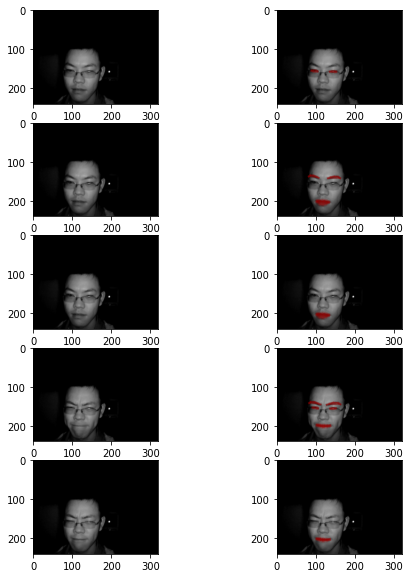

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
fig, axs = plt.subplots(nrows=n, ncols=2, figsize=(8, 2*n))
for i in range(0, n):
    axs[i][0].imshow(rgb_images[i])
    axs[i][1].imshow(inpainted_dataset_rgb[i])
plt.show()


In [ ]:
rgb_images.shape


(1848, 240, 320, 3)

In [ ]:
from PIL import Image , ImageChops

masklist = list()
for i in range(inpainted_dataset_rgb.shape[0]):

      image1 =Image.fromarray(rgb_images[i])
      image1.save('m1.jpg')

      image2 =Image.fromarray(inpainted_dataset_rgb[i])
      image2.save('m2.jpg')

      image1 = Image.open('m1.jpg')
      image2 = Image.open('m2.jpg')

      diff = ImageChops.difference(image1,image2)
      diff.save('te.jpg')

      image = Image.open('te.jpg')
      data = asarray(image).astype('float32') / 255.
      img = tf.image.rgb_to_grayscale(data)
      masklist.append(img)

mask_dataset = np.asarray(masklist)

In [ ]:
mask_dataset.shape

(1848, 240, 320, 1)

<Figure size 1440x144 with 0 Axes>

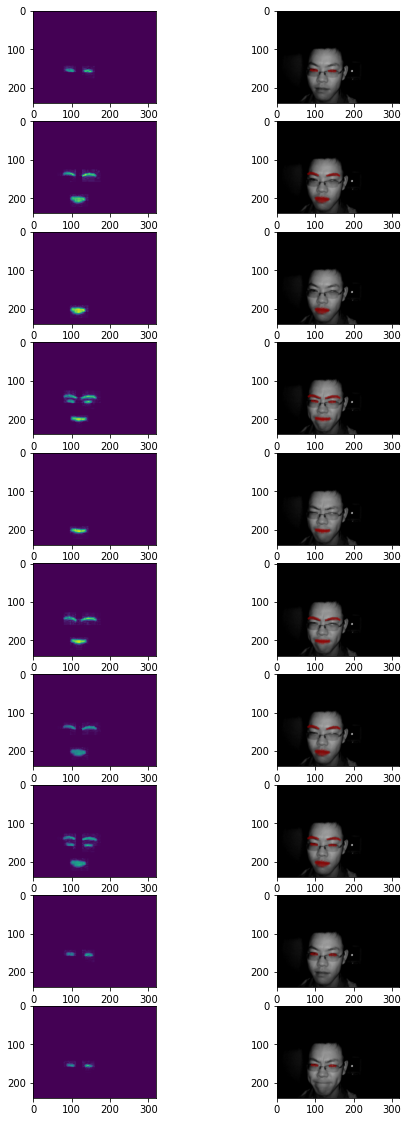

In [ ]:
mask_dataset.shape
n = 10
plt.figure(figsize=(20, 2))
fig, axs = plt.subplots(nrows=n, ncols=2, figsize=(8, 2*n))
for i in range(0, n):
    data = np.squeeze(mask_dataset[i])
    axs[i][0].imshow(data)
    axs[i][1].imshow(inpainted_dataset_rgb[i])
plt.show()

# New Section

In [ ]:
print("modified_rgb_images dimensions ",inpainted_dataset_rgb.shape)
print("orignal images dimensions ",rgb_images.shape)

modified_rgb_images dimensions  (1848, 240, 320, 3)
orignal images dimensions  (1848, 240, 320, 3)


In [ ]:
No_of_test_images = 24912
noti = inpainted_dataset_rgb.shape[0] 
#noti = 40000

x_train = inpainted_dataset_rgb[0:noti-No_of_test_images]
y_train = rgb_images[0:noti-No_of_test_images]
x_test = inpainted_dataset_rgb[noti-No_of_test_images:noti]
y_test = rgb_images[noti-No_of_test_images:noti]

#Normalization of dataset to [0,1]

# x_train=x_train/255.
y_train = y_train.astype('float32') / 255.
# x_test = x_test/255.
y_test = y_test.astype('float32') / 255.


# x_train = np.reshape(x_train, (len(x_train), 240, 320, 1))
# y_train = np.reshape(y_train, (len(y_train),  240, 320, 1))
# x_test = np.reshape(x_test, (len(x_test), 240, 320, 1))
# y_test = np.reshape(y_test, (len(y_test),  240, 320, 1))
print(x_train.shape,x_test.shape)

(1648, 240, 320, 3) (200, 240, 320, 3)


In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(240, 320,3))

conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
pool1 = layers.MaxPooling2D((2,2), padding='same')(conv1)
conv2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
# pool2 = layers.MaxPooling2D((2,2), padding='same')(conv2)
# conv3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
encoded = layers.MaxPooling2D((2, 2), padding='same')(conv2)

# At this point the representation is (7, 7, 32)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 320, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 240, 320, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 160, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 160, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 80, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 80, 32)        9248  

In [ ]:
autoencoder.fit(x_train, y_train,
                epochs=25,
                batch_size=1,
                validation_data=(x_test, y_test),)

Epoch 1/25
1648/1648 [==============================] - 53s 15ms/step - loss: 0.3083 - accuracy: 0.3510 - val_loss: 0.2835 - val_accuracy: 0.3609
Epoch 2/25
1648/1648 [==============================] - 24s 15ms/step - loss: 0.2722 - accuracy: 0.4089 - val_loss: 0.2831 - val_accuracy: 0.3963
Epoch 3/25
1648/1648 [==============================] - 24s 15ms/step - loss: 0.2718 - accuracy: 0.5670 - val_loss: 0.2828 - val_accuracy: 0.5874
Epoch 4/25
1648/1648 [==============================] - 24s 15ms/step - loss: 0.2717 - accuracy: 0.5659 - val_loss: 0.2830 - val_accuracy: 0.5499
Epoch 5/25
1648/1648 [==============================] - 24s 15ms/step - loss: 0.2718 - accuracy: 0.5057 - val_loss: 0.2828 - val_accuracy: 0.6111
Epoch 6/25
1648/1648 [==============================] - 24s 15ms/step - loss: 0.2718 - accuracy: 0.4975 - val_loss: 0.2827 - val_accuracy: 0.4027
Epoch 7/25
1648/1648 [==============================] - 24s 15ms/step - loss: 0.2715 - accuracy: 0.4591 - val_loss: 0.2825 -

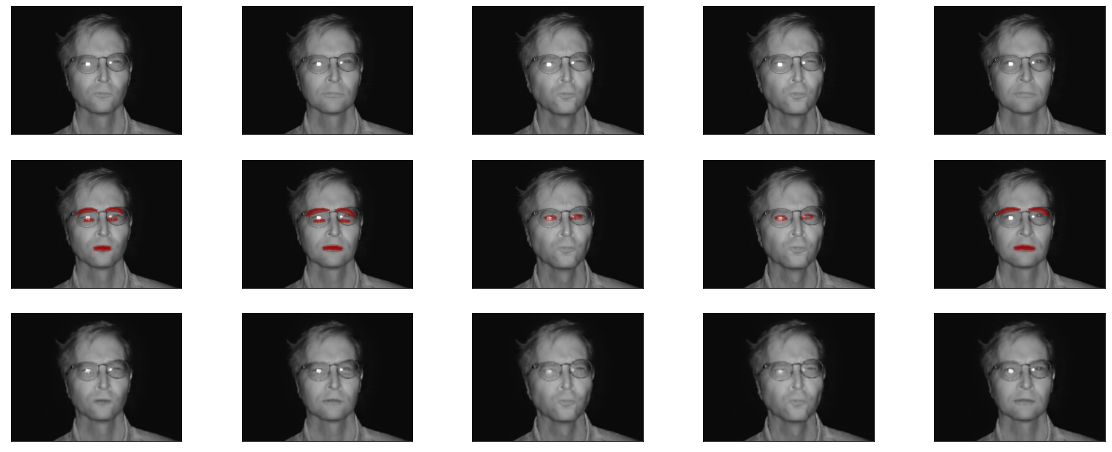

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
n = 5
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    data = np.squeeze(y_test[i])
    plt.imshow(data)
   
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display inpainted
    ax = plt.subplot(3, n, i+n)
    data = np.squeeze(x_test[i])
    plt.imshow(data)
   
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + n+n)

    data = np.squeeze(decoded_imgs[i])
    plt.imshow(data)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# 1st row contains orignal image in gray_scale
# 2nd row contains DESTRUCTURE version of orignal image in gray_scale
# 3rd row contains inpainted image  obtained from 2nd layer images in gray_scale

In [ ]:
print(decoded_imgs.shape)
train_mask = mask_dataset[noti-No_of_test_images:noti];
print(train_mask.shape)

(200, 240, 320, 3)
(200, 240, 320, 1)


In [ ]:
inpainted_image_size = (240, 320, 3)
num_classes = 2
batch_size = 1

In [ ]:
import tensorflow as tf


def get_model(img_size):
    inputs = tf.keras.layers.Input(img_size)

    #Downscaling dataset
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)

    #Upscaling dataset
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    
    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    
    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model
    
keras.backend.clear_session()

# Build model
model = get_model(inpainted_image_size)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 240, 320, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 120, 160, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
train = 24000
test =900; 
train_img = decoded_imgs[0:train];
test_img = decoded_imgs[train:test];
train_lab = train_mask[0:train];
test_lab = train_mask[train:test];
print(train_img.shape,test_img.shape,train_lab.shape,test_lab.shape);

(150, 240, 320, 3) (50, 240, 320, 3) (150, 240, 320, 1) (50, 240, 320, 1)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, doing validation at the end of each epoch.
epochs = 1000
history = model.fit(train_img,train_lab ,
                    epochs=epochs,
                    batch_size=10,
                    validation_data=(test_img,test_lab),)

Epoch 1/25
150/150 [==============================] - 7s 34ms/step - loss: 0.0544 - accuracy: 0.9605 - val_loss: 0.0166 - val_accuracy: 0.9572
Epoch 2/25
150/150 [==============================] - 4s 30ms/step - loss: 0.0124 - accuracy: 0.9643 - val_loss: 0.0144 - val_accuracy: 0.9572
Epoch 3/25
150/150 [==============================] - 5s 30ms/step - loss: 0.0109 - accuracy: 0.9643 - val_loss: 0.0130 - val_accuracy: 0.9572
Epoch 4/25
150/150 [==============================] - 5s 30ms/step - loss: 0.0100 - accuracy: 0.9643 - val_loss: 0.0123 - val_accuracy: 0.9572
Epoch 5/25
150/150 [==============================] - 4s 30ms/step - loss: 0.0094 - accuracy: 0.9643 - val_loss: 0.0118 - val_accuracy: 0.9572
Epoch 6/25
150/150 [==============================] - 5s 31ms/step - loss: 0.0092 - accuracy: 0.9643 - val_loss: 0.0120 - val_accuracy: 0.9572
Epoch 7/25
150/150 [==============================] - 4s 30ms/step - loss: 0.0089 - accuracy: 0.9643 - val_loss: 0.0118 - val_accuracy: 0.9572

In [ ]:
output = model.predict(test_img)
output.shape

(50, 240, 320, 1)

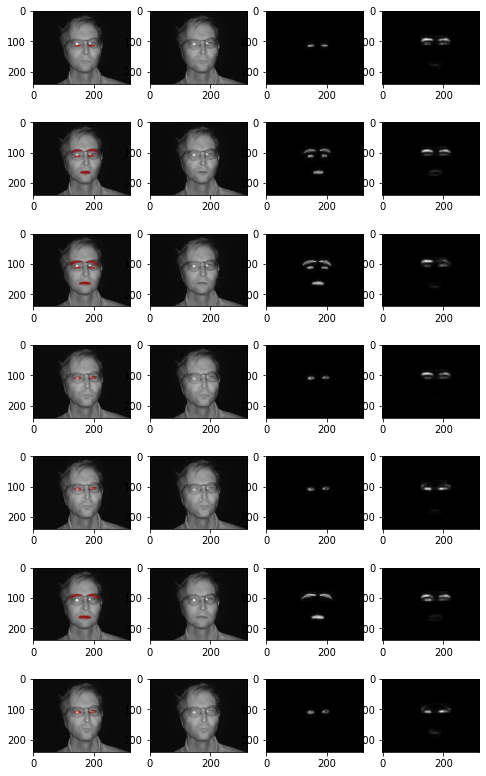

In [ ]:

testCases = 7

fig, axs = plt.subplots(nrows=testCases, ncols=4, figsize=(8, 2*testCases))
for i in range(testCases):

  data = np.squeeze(x_test[i])
  axs[i][0].imshow(data)

  data = np.squeeze(decoded_imgs[i])
  axs[i][1].imshow(data)

  data = np.squeeze(train_mask[i])
  axs[i][2].imshow(data)

  data = np.squeeze(output[i])
  axs[i][3].imshow(data)
  
plt.show()
